# Libraries Import

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
import datetime as dt
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Open Files

In [61]:
origPrices = pd.read_csv('Prices/example_sprit_cut_prices.csv', sep=';')

In [62]:
#Check Available Data
origPrices.head()

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02 05:22:01.000000,21
1,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02 05:26:01.000000,21
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1359,2014-10-02 09:06:01.000000,1
3,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539,1499,1339,2014-10-03 12:14:01.000000,21
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529,1489,1329,2014-10-03 14:14:01.000000,21


In [63]:
#Size of matrix
origPrices.shape

(2189526, 6)

In [64]:
#Data
origPrices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2189526 entries, 0 to 2189525
Data columns (total 6 columns):
STID            object
E5              int64
E10             int64
DIESEL          int64
DATE_CHANGED    object
CHANGED         int64
dtypes: int64(4), object(2)
memory usage: 100.2+ MB


# Data Explore

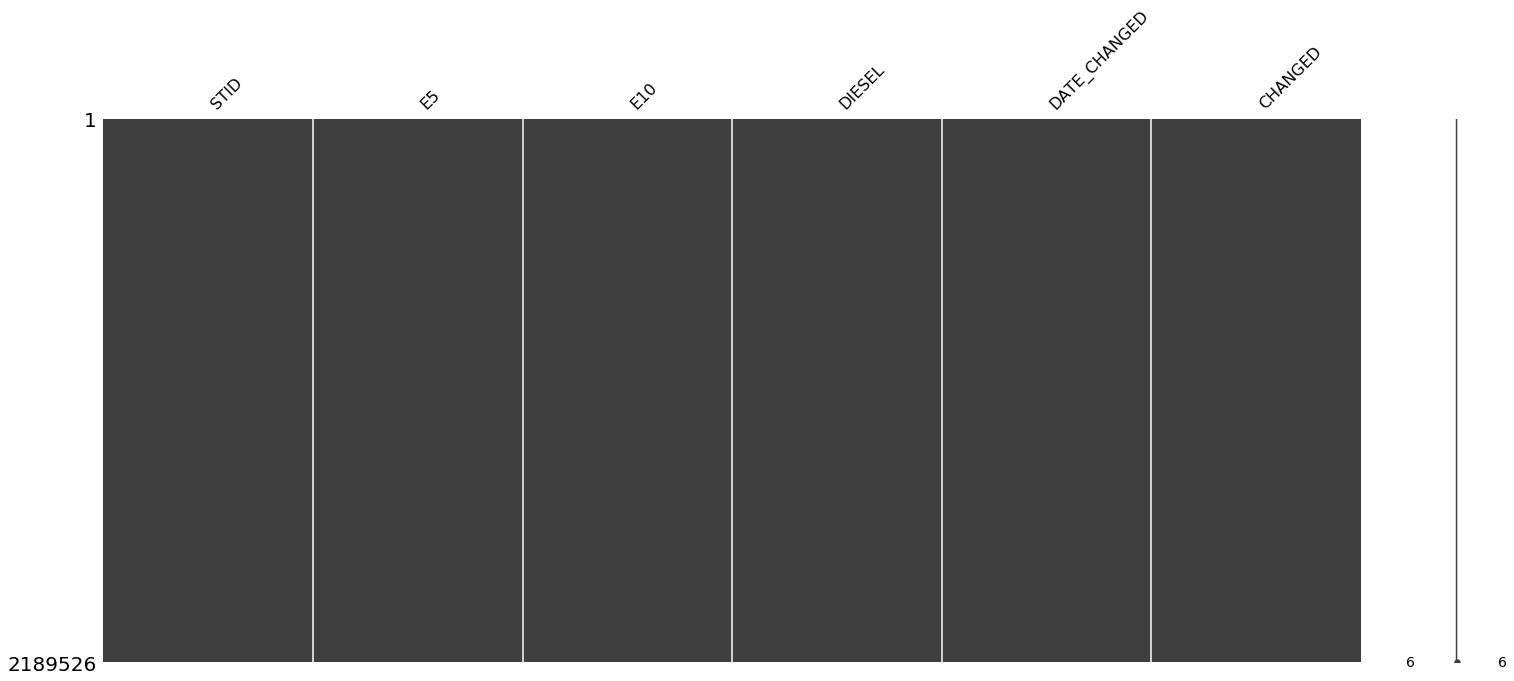

In [65]:
#No data missing
ms.matrix(origPrices)

In [66]:
df = origPrices

In [67]:
%%capture
df.drop(['CHANGED'],axis=1,inplace=True,errors='ignore')
#Convert date changed into a date format
df['DATE'] = pd.to_datetime(df.DATE_CHANGED,format='%Y-%m-%d')
#format='%Y-%m-%d')
df.drop(['DATE_CHANGED'],axis=1,inplace=True,errors='ignore')
#dataPrices.info()


In [68]:
#Strip time 
df['DATE'] = pd.to_datetime(df['DATE']).dt.date
#make the date col the index
df = df.set_index(pd.DatetimeIndex(df['DATE']))
df.head()

,STID,E5,E10,DIESEL,DATE
DATE,,,,,
2014-10-02,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02
2014-10-02,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02
2014-10-02,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1359,2014-10-02
2014-10-03,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539,1499,1339,2014-10-03
2014-10-03,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529,1489,1329,2014-10-03


In [69]:
#Average value for each day in our data set. 
df = df.groupby(df.DATE).mean()

In [70]:
#Prices 
df.describe()

,E5,E10,DIESEL
count,479.000000,479.000000,479.000000
mean,1440.906180,1409.348652,1256.664143
std,95.232122,85.748202,87.702105
min,1245.673342,1226.134335,1101.263122
25%,1362.833020,1340.975118,1190.892881
50%,1451.014890,1425.163957,1236.722901
75%,1523.285646,1482.754989,1352.790413
max,1617.331210,1565.080679,1413.049540


In [71]:
df.head()

,E5,E10,DIESEL
DATE,,,
2014-06-08,1571.523992,1519.719770,1370.583493
2014-06-09,1595.126506,1540.228916,1392.698795
2014-06-10,1573.986616,1506.304971,1377.375717
2014-06-11,1581.633186,1515.724766,1378.265387
2014-06-12,1585.888145,1523.101338,1382.322180


# Plots

Text(0.5,1,'data.corr()')

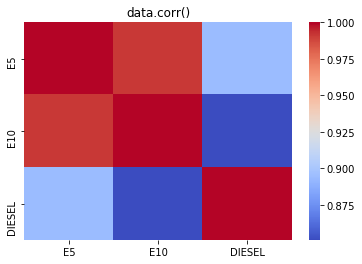

In [72]:
sns.heatmap(df.corr(),cmap='coolwarm')
plt.title('data.corr()')

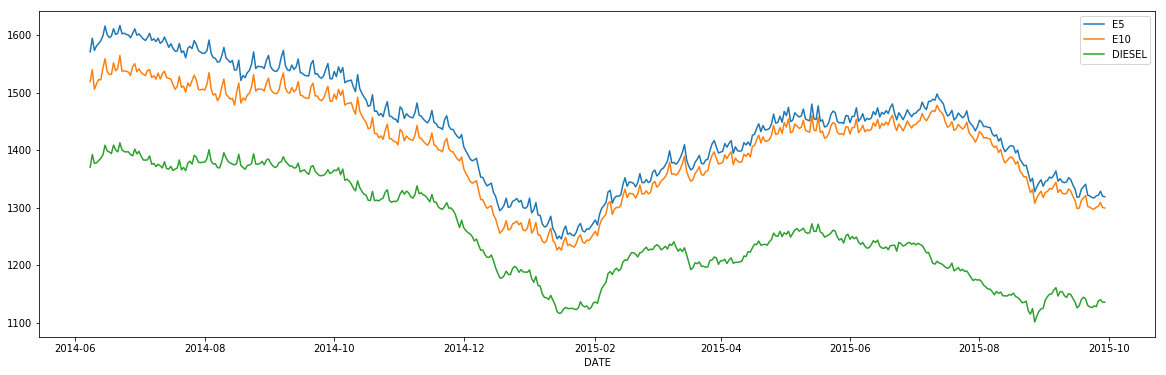

In [73]:
#Trends of each gas type

df['E5'].plot(legend=True)
df['E10'].plot(legend=True)
df['DIESEL'].plot(figsize=(20,6), legend=True)

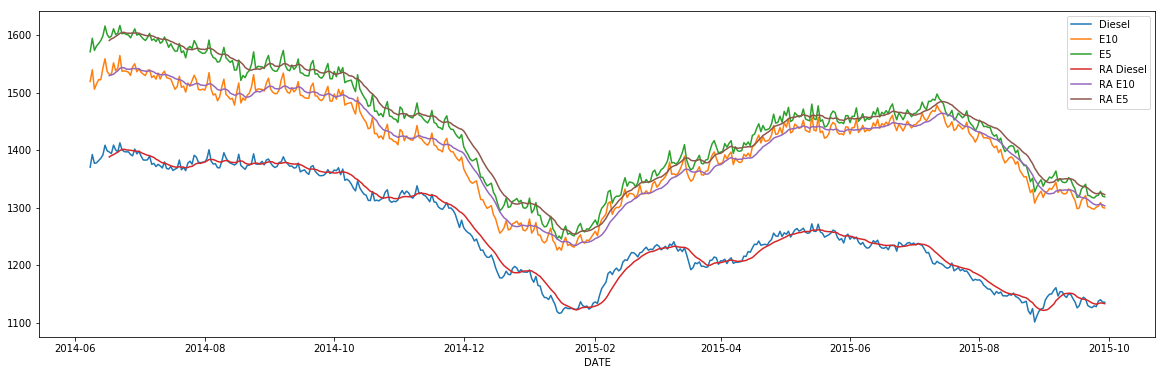

In [74]:
#Smooth out some of the sudden peaks and valleys

raE5 = df['E5'].rolling(10).mean() #10 day rolling average, E5
raE10 = df['E10'].rolling(10).mean() #10 day rolling average, E10
raDIESEL = df['DIESEL'].rolling(10).mean() #10 day rolling average, Diesel

DFra = pd.DataFrame({'E5': df['E5'], 'RA E5': raE5,
                     'E10': df['E10'], 'RA E10': raE10,
                     'Diesel': df['DIESEL'], 'RA Diesel': raDIESEL})
DFra.plot(figsize=(20, 6), legend=True, title='')

In [75]:
DFtest = DFra.drop(columns=['E5', 'E10', 'Diesel'])
DFtest = DFtest.drop(df.index[:10])

In [76]:
DFtest.tail()

,RA Diesel,RA E10,RA E5
DATE,,,
2015-09-25,1132.218026,1304.959778,1324.565344
2015-09-26,1133.398864,1305.406838,1324.953611
2015-09-27,1134.426986,1306.348279,1325.907101
2015-09-28,1133.988075,1305.125591,1324.670244
2015-09-29,1133.115709,1303.361350,1322.910438


# Training and Predicting

In [77]:
# Dimensions of dataset
n = DFtest.shape[0] #number of entries
p = DFtest.shape[1] #number of cols

DFtest = DFtest.values

In [78]:
# Training and test data
train_start = 10
train_end = int(np.floor(0.8*n)) #use 80% of our data set to train
test_start = train_end
test_end = n #and the rest to test
data_train = DFtest[np.arange(train_start, train_end), :]
data_test = DFtest[np.arange(test_start, test_end), :]

In [79]:
# Scale data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)
# Build X and y
X_train = data_train[:, 1:]
y_train = data_train[:, 0]
X_test = data_test[:, 1:]
y_test = data_test[:, 0]

# Linear regression

In [80]:
Regr = linear_model.LinearRegression()
Regr.fit(X_train,y_train)
y_pred_lr = Regr.predict(X_test)

In [81]:
# Accuracy in prediction (in percentage %)
mse = mean_squared_error(y_test,y_pred_lr)
predict_lr = mse * 100 
perc_predict_lr = 100 - predict_lr
perc_predict_lr


94.21938500936913

In [82]:
# Accuracy in training data (in percentage %)
y_trainpred_lr = Regr.predict(X_train)
mse = mean_squared_error(y_train,y_trainpred_lr)
Train_lr = mse * 100 
perc_train_lr = 100 - Train_lr
perc_train_lr

99.49218708447766

# Ridge

In [83]:
Ridge = linear_model.Ridge()
Ridge.fit(X_train,y_train)
y_pred_rd = Ridge.predict(X_test)

In [85]:
# Accuracy in prediction (in percentage %)
mse = mean_squared_error(y_test,y_pred_rd)
predict_rd = mse * 100 
perc_predict_rd = 100 - predict_rd
perc_predict_rd

91.05629017468412

In [86]:
# Accuracy in training data (in percentage %)
y_trainpred_rd = Regr.predict(X_train)
mse = mean_squared_error(y_train,y_trainpred_rd)
Train_rd = mse * 100 
perc_train_rd = 100 - Train_rd
perc_train_rd

99.49218708447766

# Decision Tree Regressor

In [87]:
DT = DecisionTreeRegressor(random_state=0)
DT.fit(X_train,y_train)
y_pred_DT = DT.predict(X_test)

In [88]:
# Accuracy in prediction (in percentage %)
mse = mean_squared_error(y_test,y_pred_DT)
predict_DT = mse * 100 
perc_predict_DT = 100 - predict_DT
perc_predict_DT

92.12858913418249

In [89]:
# Accuracy in training data (in percentage %)
y_trainpred_DT = Regr.predict(X_train)
mse = mean_squared_error(y_train,y_trainpred_DT)
Train_DT = mse * 100 
perc_train_DT = 100 - Train_DT
perc_train_DT

99.49218708447766

# KNN Regression

In [91]:
for n_neighbors in range (3,10):
    print('\n For %d Neighbors' %(n_neighbors))
    KNN = KNeighborsRegressor(n_neighbors)
    KNN.fit(X_train,y_train)
    y_pred_KNN = KNN.predict(X_test)
    
    #Prediction Accuracy
    mse = mean_squared_error(y_test,y_pred_KNN)
    Perc_predict = mse * 100  
    print('Testing Data set %f' %(100 - Perc_predict)) 
    
    #Training Data Accuracy
    y_trainpred_KNN = KNN.predict(X_train)
    mse = mean_squared_error(y_train,y_trainpred_KNN)
    Perc_predict = mse * 100 
    print('Training Data set %f' %(100 - Perc_predict))


 For 3 Neighbors
Testing Data set 93.258298
Training Data set 99.981885

 For 4 Neighbors
Testing Data set 93.249563
Training Data set 99.973301

 For 5 Neighbors
Testing Data set 93.277112
Training Data set 99.964468

 For 6 Neighbors
Testing Data set 93.426340
Training Data set 99.954226

 For 7 Neighbors
Testing Data set 93.546661
Training Data set 99.944332

 For 8 Neighbors
Testing Data set 93.578832
Training Data set 99.931410

 For 9 Neighbors
Testing Data set 93.571782
Training Data set 99.917646


In [92]:
KNN = KNeighborsRegressor(n_neighbors=8)
KNN.fit(X_train,y_train)
y_pred_KNN = KNN.predict(X_test)
    
#Prediction Accuracy
mse = mean_squared_error(y_test,y_pred_KNN)
predict_KNN = mse * 100 
perc_predict_KNN = 100 - predict_KNN

    
#Training Data Accuracy
y_trainpred_KNN = Regr.predict(X_train)
mse = mean_squared_error(y_train,y_trainpred_KNN)
Train_KNN = mse * 100 
perc_train_KNN = 100 - Train_KNN

# Support Vector Machines

In [93]:
SVM = SVR()
SVM.fit(X_train,y_train)
y_pred_SVM = SVM.predict(X_test)

In [94]:
#Predicion Accuracy
mse = mean_squared_error(y_test,y_pred_SVM)
predict_SVM = mse * 100 
perc_predict_SVM = 100 - predict_SVM
perc_predict_SVM

92.54439201906752

In [96]:
#Training Data Accuracy
y_trainpred_SVM = Regr.predict(X_train)
mse = mean_squared_error(y_train,y_trainpred_SVM)
Train_SVM = mse * 100 
perc_train_SVM = 100 - Train_SVM
perc_train_SVM

99.49218708447766

# Comparing Prediction Models

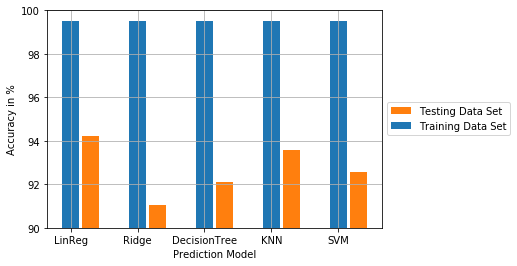

In [98]:
perc_predict = [perc_predict_lr,perc_predict_rd,perc_predict_DT,perc_predict_KNN,perc_predict_SVM]
perc_train = [perc_train_lr,perc_train_rd,perc_train_DT,perc_train_KNN,perc_train_SVM]
x = np.arange (5)
handle_train = plt.bar(x,perc_train, width = 0.25)
handle_predict = plt.bar(x+0.3,perc_predict, width = 0.25)
plt.ylim(90,100)
Tags_xaxis = ['LinReg','Ridge','DecisionTree','KNN','SVM']
plt.xticks(x,Tags_xaxis)
plt.grid()
plt.legend ([handle_predict,handle_train], ['Testing Data Set', 'Training Data Set'], bbox_to_anchor=(1.,0.6))
plt.ylabel('Accuracy in %')
plt.xlabel('Prediction Model')
plt.show()

In [99]:
#We can observe that Linear Regression is the best prediction model (94.2%) for the testing Data Set.